3.6637359812116365e-15


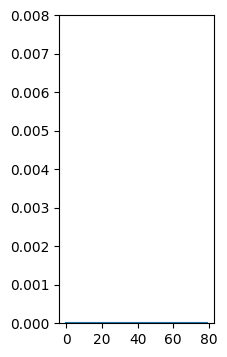

In [2]:
import time
import flopy
import numpy as np
import modflowapi
import matplotlib.pyplot as plt

initial_k = np.ones((1, 1, 80)) * 10.0

sim = flopy.mf6.MFSimulation(sim_name='model', sim_ws='./mymodel', exe_name='mf6', verbosity_level=0)
tdis = flopy.mf6.ModflowTdis(sim, nper=1, perioddata=[(365, 100, 1.0)])
ims = flopy.mf6.ModflowIms(sim)
gwf = flopy.mf6.ModflowGwf(sim, modelname='gwf_model', save_flows=True)
dis = flopy.mf6.ModflowGwfdis(gwf, nrow=1, ncol=80)
ic = flopy.mf6.ModflowGwfic(gwf)
npf = flopy.mf6.ModflowGwfnpf(gwf, 
                              k=initial_k,
                              save_specific_discharge=True)
chd = flopy.mf6.ModflowGwfchd(gwf, stress_period_data=[[(0, 0, 0),  0.000],
                                                       [(0, 0, 79), 0.000]])
oc = flopy.mf6.ModflowGwfoc(gwf, 
                            budget_filerecord=f'gwf_model.bud',
                            head_filerecord='head.hds',
                            saverecord=[('HEAD', 'ALL'), ('BUDGET', 'ALL')])
sim.write_simulation()
sim.run_simulation()

head = gwf.output.head().get_alldata()
plt.figure(figsize=(2,4))
plt.plot(head[0,0,0])
_ = plt.yticks(np.linspace(0.0,0.008,9))
_ = plt.xticks(np.linspace(0.0,80,5))

print(head[-1, 0, 0, 52])